<a href="https://colab.research.google.com/github/rifanijuni/time-series-visual/blob/main/21_Rifani_Juniarti_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/datasets/GlobalLandTemperaturesByCountry.csv", encoding= 'unicode_escape',
                 parse_dates=True, index_col="dt")

df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Ã land
1743-12-01,NaN,NaN,Ã land
1744-01-01,NaN,NaN,Ã land
1744-02-01,NaN,NaN,Ã land
1744-03-01,NaN,NaN,Ã land


In [5]:
# Hapus semua baris yang mengandung nilai kosong
df_filtered = df.dropna()

# Tampilkan DataFrame yang sudah difilter
df_filtered.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Ã land
1744-04-01,1.530,4.680,Ã land
1744-05-01,6.702,1.789,Ã land
1744-06-01,11.609,1.577,Ã land
1744-07-01,15.342,1.410,Ã land


In [6]:
# Informasi struktur data
print(df_filtered.info())

# Deskripsi statistik data
print(df_filtered.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 544811 entries, 1743-11-01 to 2013-08-01
Data columns (total 3 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AverageTemperature             544811 non-null  float64
 1   AverageTemperatureUncertainty  544811 non-null  float64
 2   Country                        544811 non-null  object 
dtypes: float64(2), object(1)
memory usage: 16.6+ MB
None
       AverageTemperature  AverageTemperatureUncertainty
count       544811.000000                  544811.000000
mean            17.193354                       1.019190
std             10.953966                       1.202634
min            -37.658000                       0.052000
25%             10.025000                       0.323000
50%             20.901000                       0.571000
75%             25.814000                       1.207000
max             38.842000                      15.00300

**Visualisasi**

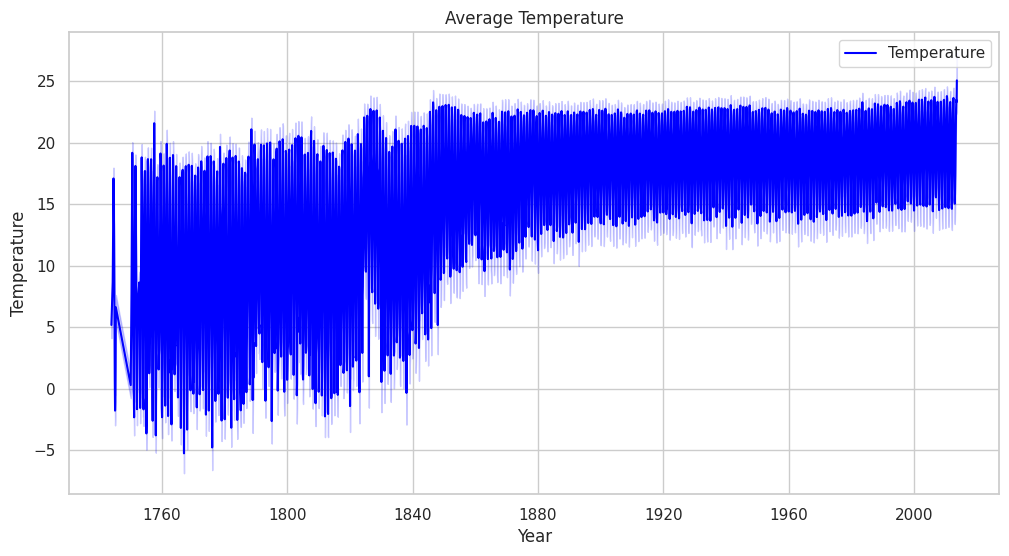

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered['AverageTemperature'], label='Temperature', color='blue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Temperature')

plt.show()

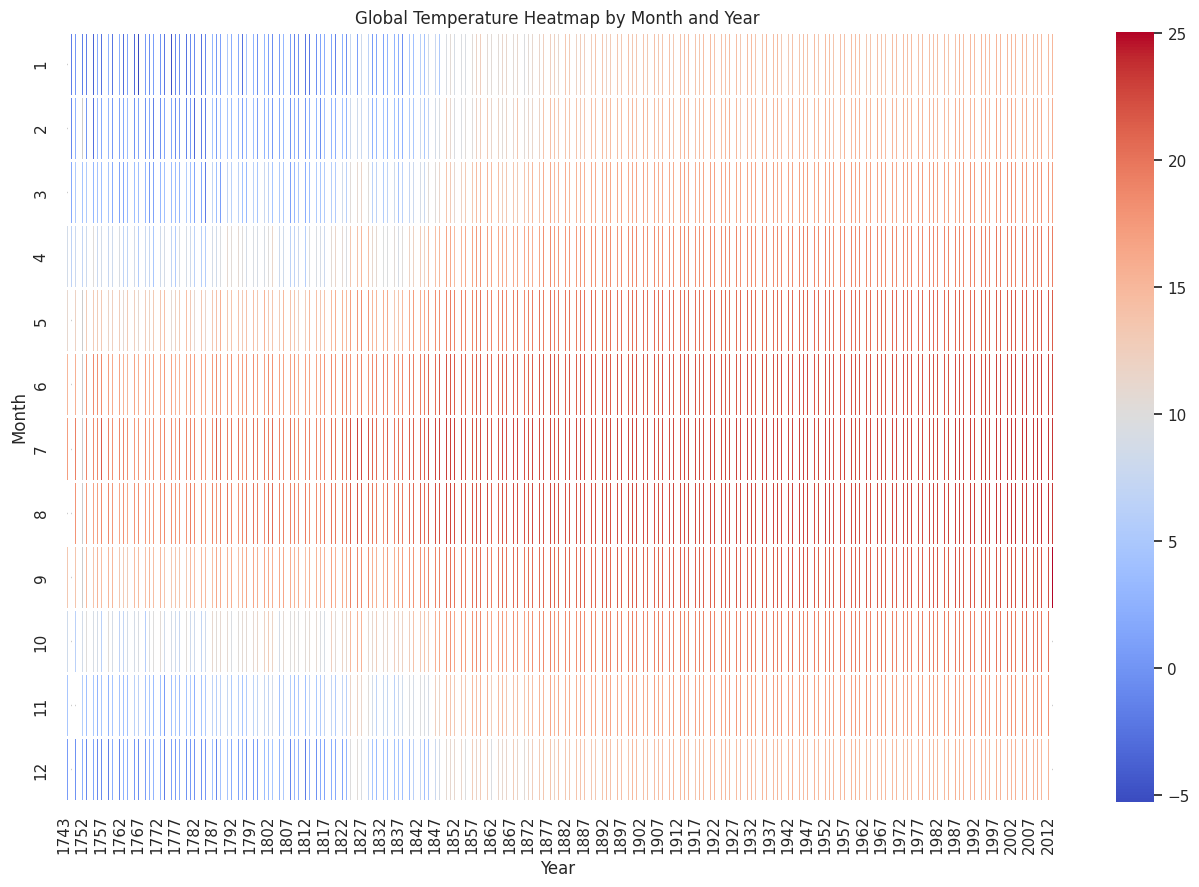

In [11]:
data = pd.read_csv("/content/drive/My Drive/datasets/GlobalLandTemperaturesByCountry.csv", encoding= 'unicode_escape')

# Konversi kolom 'dt' menjadi tipe data datetime
data['dt'] = pd.to_datetime(data['dt'])

# Menambahkan kolom 'Year' dan 'Month' berdasarkan kolom 'dt'
data['Year'] = data['dt'].dt.year
data['Month'] = data['dt'].dt.month

# Pivot tabel untuk heatmap
pivot_table = data.pivot_table(values='AverageTemperature', index='Month', columns='Year', aggfunc='mean')

# Membuat heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='coolwarm', linecolor='white', linewidth=1)
plt.title('Global Temperature Heatmap by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

<ipython-input-15-2150c1fe8167>:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  colorbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))


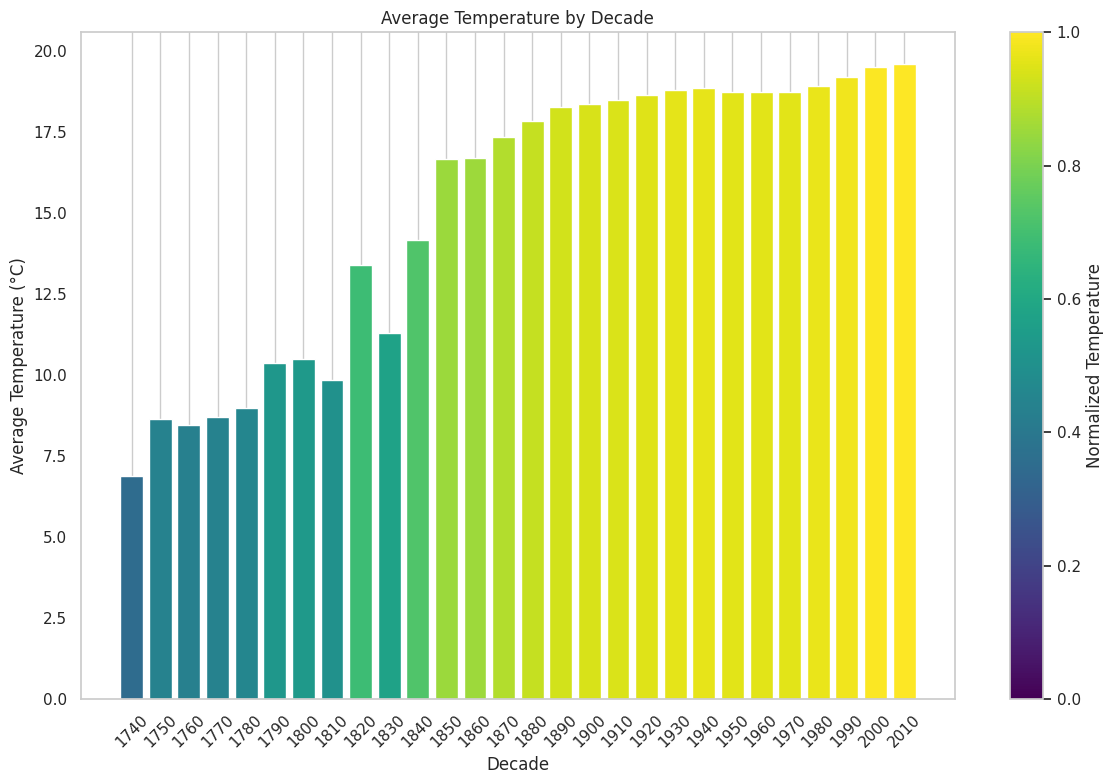

In [15]:
# Menambahkan kolom 'Decade' berdasarkan tahun
data['Decade'] = data['dt'].dt.year // 10 * 10

# Menghitung rata-rata suhu berdasarkan dekade
decade_avg_temp = data.groupby('Decade')['AverageTemperature'].mean()

# Membuat diagram batang
plt.figure(figsize=(12, 8))
bar_plot = plt.bar(decade_avg_temp.index.astype(str), decade_avg_temp,
                   color=plt.cm.viridis(decade_avg_temp / decade_avg_temp.max()))  # Menggunakan colormap 'viridis'
plt.title('Average Temperature by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Menambahkan colorbar untuk menunjukkan skala warna
colorbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
colorbar.set_label('Normalized Temperature')

plt.tight_layout()
plt.show()

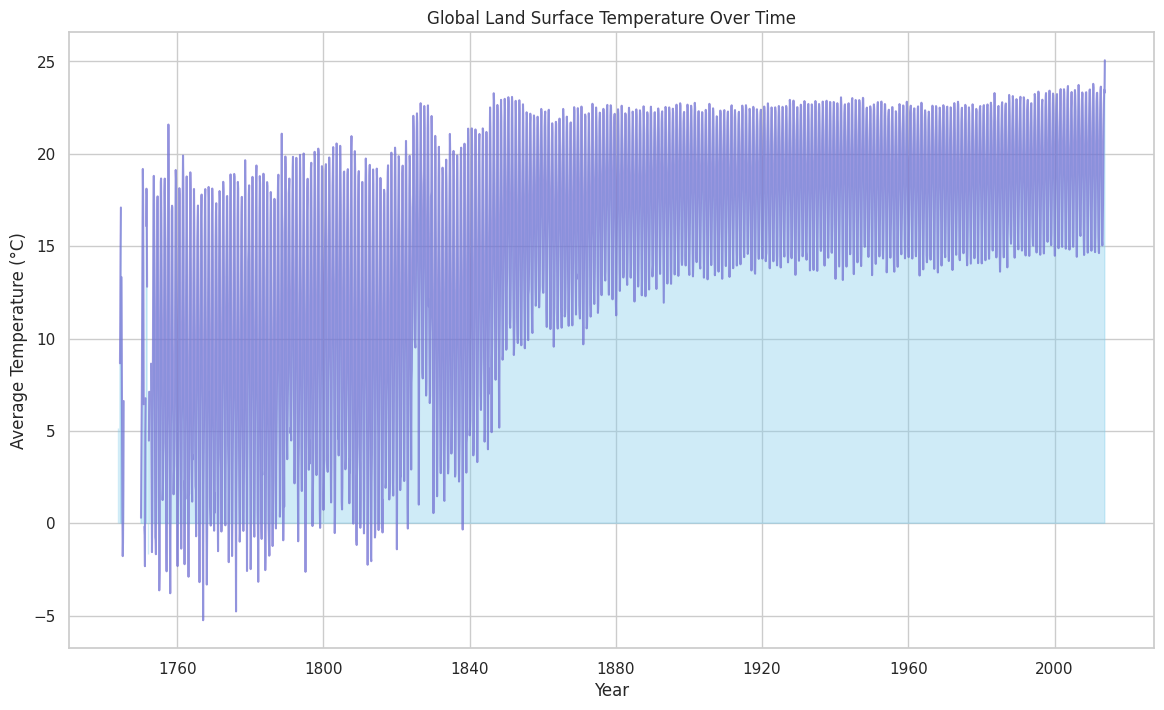

In [18]:
data.set_index('dt', inplace=True)

# Resample data menjadi rata-rata bulanan
monthly_avg_temp = data['AverageTemperature'].resample('M').mean()

# Plot time series dengan area plot
plt.figure(figsize=(14, 8))
plt.fill_between(monthly_avg_temp.index, monthly_avg_temp, color='skyblue', alpha=0.4)
plt.plot(monthly_avg_temp.index, monthly_avg_temp, color='Slateblue', alpha=0.6)
plt.title('Global Land Surface Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()